In [1]:
%matplotlib inline 
import numpy as np
from pylab import  *

dt = 0.01 # in ms
n_steps = 10000

b_0 = 1.25 #2
b_1 = 0.875 #1.5
epsilon = 0.064 #0.1



u = np.zeros((n_steps))
u[0] = -1.5 # in mV
w = np.zeros((n_steps))
w[0] = -0.32
I_in = 0*np.ones((n_steps))

In [2]:
for i in arange(n_steps-1):
    dudt = u[i]-1/3*u[i]**3-w[i]+I_in[i]
    dwdt = epsilon*(b_0+b_1*u[i]-w[i])
    
    u[i+1] =u[i]+dt*dudt
    w[i+1] =w[i]+dt*dwdt
print(u[2])
print(u[5000])

-1.523719648
-3.46682995086e+20


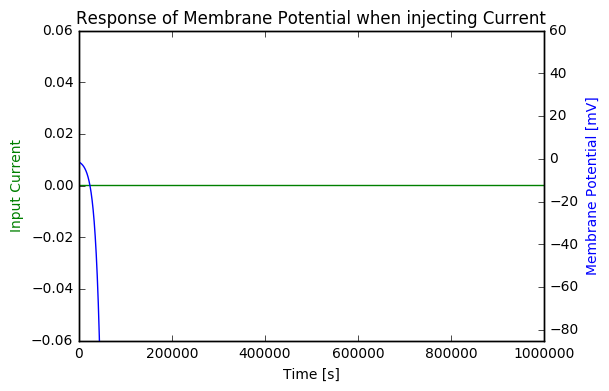

In [3]:
tt = np.linspace(0, n_steps/dt, n_steps)
fig, ax1 = subplots()

ax2 = ax1.twinx()
ax1.plot(tt, I_in, 'g-')
ax2.plot(tt, u, 'b-')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Input Current', color='g') # which unit?
ax2.set_ylabel('Membrane Potential [mV]', color='b')
ax2.set_ylim([-85, 60])
title("Response of Membrane Potential when injecting Current")
show()